<h1>Assignment 2</h1>

<h2>Due: Mon 04 Jan 2021 Midnight</h2>
<a href='http://www.cs.bgu.ac.il/~elhadad/nlp21.html'>Natural Language Processing - Fall 2021 Michael Elhadad</a>
<p/>
This assignment covers the topic of document classification, sequence classification, named entity recognition and word embeddings.
The objective is:
<ul>
<li>Apply feature-based supervised machine learning methods for document and token classification.</li>
<li>Investigate algorithms for sequence classification: HMMs and CRFs.</li>
<li>Learn the specific tasks of word classification, named entity recognition and document classification.
<li>Use pre-trained word embeddings and measure whether they help for the task of NER.
</ul>

<p/>
Submit your solution by email in the form of an iPython ipynb file.
<p/>
Do <b>not</b> attach the data in your submission.  Your notebook should refer to the data folder as "../data".

<p>
</p><hr>
<h2>Content</h2>
<ul>
    <li><a href="#questions">Q1. Questions Classification</a>
      <ul>
      <li><a href="#q1.1">Q1.1. Describe the dataset qualitatively</a></li>
      <li><a href="#q1.2">Q1.2. Dataset Reader</a></li>
      <li><a href="#q1.3">Q1.3. Dataset Exploration</a></li>
      <li><a href="#q1.4">Q1.4. Classifier Interface, Evaluation Metrics, Confusion Matrix</a></li>
      <li><a href="#q1.5">Q1.5 Baseline Classifier</a></li>
      <li><a href="#q1.6">Q1.6 Features-based Classifier</a></li>
      <li><a href="#q1.7">Q1.7. Optional</a></li>
      </ul>
    </li>
    <li><a href="#q2">Q2. Document Classification</a>
      <ul>
        <li><a href="#q2.1">Q2.1 Reuters Dataset</a>
          <ul>
          <li><a href="#q2.1.1">Q2.1.1 Descriptive Statistics</a></li>
          <li><a href="#q2.1.2">Q2.1.2 Partial-fit classifiers</a></li>
          <li><a href="#q2.1.3">Q2.1.3 Hashing Vectorizer</a></li>
          </ul>
        </li>
        <li><a href="#q2.2">Q2.2. BBC News Dataset</a>
          <ul>
            <li><a href="#q2.2.1">Q2.2.1 Descriptive Statistics</a></li>
            <li><a href="#q2.2.2">Q2.2.2 Feature Extraction</a></li>
            <li><a href="#q2.2.3">Q2.2.3 Model Training and Evaluation</a></li>
            </ul>
        </li>
      </ul>
    </li>
    <li><a href="#q3">Q3. Named Entity Recognition</a>
      <ul>
        <li><a href="#q3.1">Q3.1 Features</a>
          <ul>
            <li><a href="#q3.1.1">Q3.1.1 Feature Extraction</a></li>
            <li><a href="#q3.1.2">Q3.1.2 Model Training</a></li>
            <li><a href="#q3.1.3">Q3.1.3 Greedy Tagging vs. Sequence Tagging</a></li>
          </ul>
        </li>
        <li><a href="#q3.2">Q3.2 Using Word Embeddings</a></li>
      </ul>
</ul>


<hr/>
<a name="questions"></a>
<h2>Q1. Questions Classification</h2>

Consider the dataset on Question Classification available <a href="https://cogcomp.seas.upenn.edu/Data/QA/QC/">here</a>.

<a name="q1.1"></a>
<h3>Q1.1. Describe the dataset qualitatively</h3>

Read the article introducing this dataset: 
<a href="http://www.aclweb.org/anthology/C02-1150">in Li, Dan Roth, Learning Question Classifiers. COLING'02</a>.
<p/>
Write a half to one-page summary of the paper, focusing on the dataset description (more than on the description of the classifier introduced in the paper).
Describe the exact task, the labels used, and provide the motivation for this task.
Provide examples for the 6 main categories.


<a name="q1.2"></a>
<h3>Q1.2. Dataset Reader</h3>

Implement a reader to parse the dataset into a data structure that will be easily used for scikit-learn processing.

Adapt the code we used in HW1:


In [2]:
import codecs
import math
import random
import string
import time
import numpy as np
from sklearn.metrics import accuracy_score

'''
Define different constants for the task of question classification 
based on the definition of the task.
In the question classification case, there are 2 labels per question: coarse and fine.
'''
coarse_categories = ["ABBREVIATION", "ENTITY", "DESCRIPTION", "HUMAN", "LOCATION", "NUMERIC VALUE"]
fine_categories = {}
fine_categories["ABBREVIATION"] = ["abb", "exp"]
# @Todo more here...

# Build the category_lines dictionary, a list of names per language
coarse_category_lines = {}
all_categories = []

# @Todo: Define the way the lines should be parsed
def parseLine(line):
  return line

# @Todo: Read a file and split into lines - create the appropriate data structure
def readLines(filename):
  lines = codecs.open(filename, "r",encoding='utf-8', errors='ignore').read().strip().split('\n')
  return [parseLine(line) for line in lines]

<a name="q1.3"></a>
<h3>Q1.3. Dataset Exploration</h3>

The labels used to classify the questions are organized in two levels:
<ul>
<li>6 coarse classes (ABBREVIATION, ENTITY, DESCRIPTION, HUMAN, LOCATION and NUMERIC VALUE)
<li>50 fine classes (see Table 1 of the article above)
</ul>

The definition of the question labels is provided <a href="https://cogcomp.seas.upenn.edu/Data/QA/QC/definition.html">here</a>.
<p/>

Provide a quantitative description of the dataset:
<ol>
<li>Distribution of the question labels (number / percentage) - separately for coarse and fine labels.
<li>Distribution of the number of tokens per question - overall and per label.
<li>Vocabulary size and number of tokens overall and per label.
<li>Top 20 more frequent words overall and per label
<li>Number of words occurring 1,2,3,4 and 5 times
</ol>

For this type of exploration, the <a href="https://pandas.pydata.org/">pandas</a> library is extremely convenient.
In particular, explore the function dataframe.describe().  You can use other code if you prefer.


<a name="q1.4"></a>
<h3>Q1.4. Classifier Interface, Evaluation Metrics, Confusion Matrix</h3>

Define the Python interface (functions or class according to your preference) of a question classifier so that the 
function accuracy_score and classification_report from the sklearn.metrics module can be used.

Define a function evaluate_classifier that takes a trained classifier and reports classification results for 
coarse and fine categories.

Define a function confusion_matrix(model) which prints a confusion matrix for the coarse level categories in the same
way as in HW1 Question 3.


<a name="q1.5"></a>
<h3>Q1.5 Baseline Classifier</h3>

Implement a baseline classifier for the 6 coarse labels using the heuristics described in the paper in Section 2.1
(of the form – If a query starts with Who or Whom: type Human).
<p/>

Report on the accuracy, precision, recall, and F1 measure for all the coarse labels, and provide
the confusion matrix for the 6 coarse labels.
<p/>

Analyze the errors by listing types of errors (false positives and false negatives for each of the 6 labels).


<a name="q1.6"></a>
<h3>Q1.6 Features-based Classifier</h3>

Implement a feature-based classifier for the 6 coarse labels using the types of features described in the paper Section 3.2: words, POS tags, NER tags.  
<p/>

Use the <a href="https://spacy.io/usage/spacy-101">spacy</a> library to perform pre-processing of the questions - including POS tagging and Named Entity Recognition and Noun Chunks detection.  Spacy comes with excellent pre-trained models for English and other languages.
Installing Spacy requires the following steps (see <a href="https://spacy.io/usage/spacy-101#annotations-ner">spacy documentation</a>):


In [4]:
# This installs the Spacy library (13MB)
!pip install spacy
# This downloads pre-trained models for POS tagging / NER / Noun chunks in English (34MB)
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [5]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')
print(doc.ents)
print(doc.ents[0].label_)

(Apple, U.K., $1 billion)
ORG


Invoking the 'nlp()' function of spacy performs a set of analyses on the text, including: sentence separation, tokenization, lemmatization, parts of speech tagging, 
Noun-phrase chunking, named entity recognition and syntactic parsing.  Information about these analyses is retrieved using the spacy document properties.

As indicated in the paper, we want to extract the following information as features for the task of question classification:
<ul>
  <li>Tokens</li>
  <li>Lemmas</li>
  <li>Parts of speech tags</li>
  <li>Noun phrase chunks</li>
  <li>Named entities</li>
</ul>

Here are starting points to learn how to extract this information from the nlp analysis:

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')
  
# Token level features retrieved by Spacy: token, lemma, POS
for x in doc:   # Each x is a Token
    print(f"Token: {x} - Lemma: {x.lemma_} - POS: {x.pos_}")

Token: Apple - Lemma: Apple - POS: PROPN
Token: is - Lemma: be - POS: AUX
Token: looking - Lemma: look - POS: VERB
Token: at - Lemma: at - POS: ADP
Token: buying - Lemma: buy - POS: VERB
Token: U.K. - Lemma: U.K. - POS: PROPN
Token: startup - Lemma: startup - POS: NOUN
Token: for - Lemma: for - POS: ADP
Token: $ - Lemma: $ - POS: SYM
Token: 1 - Lemma: 1 - POS: NUM
Token: billion - Lemma: billion - POS: NUM


In [7]:
# Span level features retrieved by Spacy: named entities, start (0-based index), end (index just after the span), category
print(doc.ents)
for e in doc.ents: 
    print(f"{e} - {e.start} - {e.end} - {e.label_}")

(Apple, U.K., $1 billion)
Apple - 0 - 1 - ORG
U.K. - 5 - 6 - GPE
$1 billion - 8 - 11 - MONEY


In [8]:
# Span level features retrieved by Spacy: noun chunks
print(list(doc.noun_chunks))
for c in doc.noun_chunks: 
    print(f"{c.start} - {c.end} - {c.root}")

[Apple, U.K. startup]
0 - 1 - Apple
5 - 7 - startup


The paper does not explicitly indicate how to encode the features it lists and is not precise about the features named `related words` (words which are usually associated with a specific type of questions).  For example:
<ol>
<li>Word features can be encoded in different ways: noise words filtered or not, with or without lemmatization, with or without case normalization (all lower-case).  
<li>POS features can be encoded in different ways: as a bag of POS-tags, or associated with the word in a bag-of-tagged words such as 'Apple/PROPN' 
<li>Chunks can be encoded as a bag of chunk-roots 
<li>Examples of "related words" per category are provided for a few categories: <a href="https://cogcomp.seas.upenn.edu/Data/QA/QC/lists/prof">profession</a>,
    <a href="https://cogcomp.seas.upenn.edu/Data/QA/QC/lists/mount">mountains</a> and <a href="https://cogcomp.seas.upenn.edu/Data/QA/QC/lists/food">food</a>.
  You should learn the related words list from the training dataset by detecting words which have a high chi-square
value with each category.  Read in <a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html">sklearn.feature_selection.chi2</a> for a discussion of how such words can be efficiently computed using scikit-learn.
</li>
</ol>


<a name="q1.6.1"></a>
<h4>Q1.6.1 Feature Extraction</h4>

Discuss a priori what are good ways to encode these features (lemma, POS, NER, chunk, related words) - provide examples that explain your intuition.
<p/>
Implement a feature extraction function that turns a question into a feature vector appropriate for the scikit-learn classifiers.
Adopt the example shown in the scikit-learn documentation: 
<a href="https://scikit-learn.org/stable/modules/feature_extraction.html#loading-features-from-dicts">loading features from dicts</a>.

<a name="q1.6.2"></a>
<h4>Q1.6.2 Train Models</h4>

Train scikit-learn based classifiers for:
<ol>
<li>Coarse labels
<li>All labels as a flat classifier
<li>A hierarchical classifier which predicts the fine-grained labels given the coarse label as proposed in the paper.  Implement this as a two-step procedure - run the coarse-label classifier, then a second level classifier which takes the prediction of the first classifier as input (one finer classifier per coarse category).
</ol>

For each of the three classifiers, report:
<ol>
<li>Accuracy, Precision, Recall, F-measure per label and confusion matrix.
<li>Provide examples of prediction errors (positive and negative).
<li>Discuss the most ambiguous label pairs (identified in the confusion matrix) and discuss whether the features you have used provide sufficient information to disambiguate the cases.
</ol>

You should experiment with different classifiers from those illustrated in the
<a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html">
Classification of text documents using sparse features</a> example.
<p/>

<a name="q1.7"></a>
<h3>Q1.7 Optional</h3>

1.7.1 Analyze which of the features are most helpful for this task among lemma, POS, NER, Chunks and Related Words.
(This analysis is called <a href="https://en.wikipedia.org/wiki/Ablation_(artificial_intelligence)#:~:text=In%20artificial%20intelligence%20(AI)%2C,component%20to%20the%20overall%20system.">ablation analysis</a>).
<p/>

1.7.2 The dataset is quite small (5,500 questions in the training dataset for 50 labels).
How would you determine whether your model overfits on this data? 

<hr/>
<a name="q2"></a>
<h2>Q2. Document Classification</h2>

<a name="q2.1"></a>
<h3>Q2.1. Reuters Dataset</h3>

Execute the notebook tutorial of Scikit-Learn on text classification: 
<a href="http://scikit-learn.org/dev/auto_examples/applications/plot_out_of_core_classification.html#example-applications-plot-out-of-core-classification-py">out of core classification</a>.
<p/>

In [2]:

from glob import glob
import itertools
import os.path
import re
import tarfile
import time
import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

from html.parser import HTMLParser
from urllib.request import urlretrieve
from sklearn.datasets import get_data_home
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB


def _not_in_sphinx():
    # Hack to detect whether we are running by the sphinx builder
    return '__file__' in globals()

class ReutersParser(HTMLParser):
    """Utility class to parse a SGML file and yield documents one at a time."""

    def __init__(self, encoding='latin-1'):
        HTMLParser.__init__(self)
        self._reset()
        self.encoding = encoding

    def handle_starttag(self, tag, attrs):
        method = 'start_' + tag
        getattr(self, method, lambda x: None)(attrs)

    def handle_endtag(self, tag):
        method = 'end_' + tag
        getattr(self, method, lambda: None)()

    def _reset(self):
        self.in_title = 0
        self.in_body = 0
        self.in_topics = 0
        self.in_topic_d = 0
        self.title = ""
        self.body = ""
        self.topics = []
        self.topic_d = ""

    def parse(self, fd):
        self.docs = []
        for chunk in fd:
            self.feed(chunk.decode(self.encoding))
            for doc in self.docs:
                yield doc
            self.docs = []
        self.close()

    def handle_data(self, data):
        if self.in_body:
            self.body += data
        elif self.in_title:
            self.title += data
        elif self.in_topic_d:
            self.topic_d += data

    def start_reuters(self, attributes):
        pass

    def end_reuters(self):
        self.body = re.sub(r'\s+', r' ', self.body)
        self.docs.append({'title': self.title,
                          'body': self.body,
                          'topics': self.topics})
        self._reset()

    def start_title(self, attributes):
        self.in_title = 1

    def end_title(self):
        self.in_title = 0

    def start_body(self, attributes):
        self.in_body = 1

    def end_body(self):
        self.in_body = 0

    def start_topics(self, attributes):
        self.in_topics = 1

    def end_topics(self):
        self.in_topics = 0

    def start_d(self, attributes):
        self.in_topic_d = 1

    def end_d(self):
        self.in_topic_d = 0
        self.topics.append(self.topic_d)
        self.topic_d = ""


def stream_reuters_documents(data_path=None):
    """Iterate over documents of the Reuters dataset.

    The Reuters archive will automatically be downloaded and uncompressed if
    the `data_path` directory does not exist.

    Documents are represented as dictionaries with 'body' (str),
    'title' (str), 'topics' (list(str)) keys.

    """

    DOWNLOAD_URL = ('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                    'reuters21578-mld/reuters21578.tar.gz')
    ARCHIVE_FILENAME = 'reuters21578.tar.gz'

    if data_path is None:
        data_path = os.path.join(get_data_home(), "reuters")
    if not os.path.exists(data_path):
        """Download the dataset."""
        print("downloading dataset (once and for all) into %s" %
              data_path)
        os.mkdir(data_path)

        def progress(blocknum, bs, size):
            total_sz_mb = '%.2f MB' % (size / 1e6)
            current_sz_mb = '%.2f MB' % ((blocknum * bs) / 1e6)
            if _not_in_sphinx():
                sys.stdout.write(
                    '\rdownloaded %s / %s' % (current_sz_mb, total_sz_mb))

        archive_path = os.path.join(data_path, ARCHIVE_FILENAME)
        urlretrieve(DOWNLOAD_URL, filename=archive_path,
                    reporthook=progress)
        if _not_in_sphinx():
            sys.stdout.write('\r')
        print("untarring Reuters dataset...")
        tarfile.open(archive_path, 'r:gz').extractall(data_path)
        print("done.")

    parser = ReutersParser()
    for filename in glob(os.path.join(data_path, "*.sgm")):
        for doc in parser.parse(open(filename, 'rb')):
            yield doc
    

In [3]:
vectorizer = HashingVectorizer(decode_error='ignore', n_features=2 ** 18,
                               alternate_sign=False)


# Iterator over parsed Reuters SGML files.
data_stream = stream_reuters_documents()

# We learn a binary classification between the "acq" class and all the others.
# "acq" was chosen as it is more or less evenly distributed in the Reuters
# files. For other datasets, one should take care of creating a test set with
# a realistic portion of positive instances.
all_classes = np.array([0, 1])
positive_class = 'acq'

# Here are some classifiers that support the `partial_fit` method
partial_fit_classifiers = {
    'SGD': SGDClassifier(max_iter=5),
    'Perceptron': Perceptron(),
    'NB Multinomial': MultinomialNB(alpha=0.01),
    'Passive-Aggressive': PassiveAggressiveClassifier(),
}


def get_minibatch(doc_iter, size, pos_class=positive_class):
    """Extract a minibatch of examples, return a tuple X_text, y.

    Note: size is before excluding invalid docs with no topics assigned.

    """
    data = [('{title}\n\n{body}'.format(**doc), pos_class in doc['topics'])
            for doc in itertools.islice(doc_iter, size)
            if doc['topics']]
    if not len(data):
        return np.asarray([], dtype=int), np.asarray([], dtype=int)
    X_text, y = zip(*data)
    return X_text, np.asarray(y, dtype=int)


def iter_minibatches(doc_iter, minibatch_size):
    """Generator of minibatches."""
    X_text, y = get_minibatch(doc_iter, minibatch_size)
    while len(X_text):
        yield X_text, y
        X_text, y = get_minibatch(doc_iter, minibatch_size)


# test data statistics
test_stats = {'n_test': 0, 'n_test_pos': 0}

# First we hold out a number of examples to estimate accuracy
n_test_documents = 1000
tick = time.time()
X_test_text, y_test = get_minibatch(data_stream, 1000)
parsing_time = time.time() - tick
tick = time.time()
X_test = vectorizer.transform(X_test_text)
vectorizing_time = time.time() - tick
test_stats['n_test'] += len(y_test)
test_stats['n_test_pos'] += sum(y_test)
print("Test set is %d documents (%d positive)" % (len(y_test), sum(y_test)))


def progress(cls_name, stats):
    """Report progress information, return a string."""
    duration = time.time() - stats['t0']
    s = "%20s classifier : \t" % cls_name
    s += "%(n_train)6d train docs (%(n_train_pos)6d positive) " % stats
    s += "%(n_test)6d test docs (%(n_test_pos)6d positive) " % test_stats
    s += "accuracy: %(accuracy).3f " % stats
    s += "in %.2fs (%5d docs/s)" % (duration, stats['n_train'] / duration)
    return s


cls_stats = {}

for cls_name in partial_fit_classifiers:
    stats = {'n_train': 0, 'n_train_pos': 0,
             'accuracy': 0.0, 'accuracy_history': [(0, 0)], 't0': time.time(),
             'runtime_history': [(0, 0)], 'total_fit_time': 0.0}
    cls_stats[cls_name] = stats

get_minibatch(data_stream, n_test_documents)
# Discard test set

# We will feed the classifier with mini-batches of 1000 documents; this means
# we have at most 1000 docs in memory at any time.  The smaller the document
# batch, the bigger the relative overhead of the partial fit methods.
minibatch_size = 1000

# Create the data_stream that parses Reuters SGML files and iterates on
# documents as a stream.
minibatch_iterators = iter_minibatches(data_stream, minibatch_size)
total_vect_time = 0.0

# Main loop : iterate on mini-batches of examples
for i, (X_train_text, y_train) in enumerate(minibatch_iterators):

    tick = time.time()
    X_train = vectorizer.transform(X_train_text)
    total_vect_time += time.time() - tick

    for cls_name, cls in partial_fit_classifiers.items():
        tick = time.time()
        # update estimator with examples in the current mini-batch
        cls.partial_fit(X_train, y_train, classes=all_classes)

        # accumulate test accuracy stats
        cls_stats[cls_name]['total_fit_time'] += time.time() - tick
        cls_stats[cls_name]['n_train'] += X_train.shape[0]
        cls_stats[cls_name]['n_train_pos'] += sum(y_train)
        tick = time.time()
        cls_stats[cls_name]['accuracy'] = cls.score(X_test, y_test)
        cls_stats[cls_name]['prediction_time'] = time.time() - tick
        acc_history = (cls_stats[cls_name]['accuracy'],
                       cls_stats[cls_name]['n_train'])
        cls_stats[cls_name]['accuracy_history'].append(acc_history)
        run_history = (cls_stats[cls_name]['accuracy'],
                       total_vect_time + cls_stats[cls_name]['total_fit_time'])
        cls_stats[cls_name]['runtime_history'].append(run_history)

        if i % 3 == 0:
            print(progress(cls_name, cls_stats[cls_name]))
    if i % 3 == 0:
        print('\n')
        

Test set is 975 documents (104 positive)
                 SGD classifier : 	   982 train docs (   146 positive)    975 test docs (   104 positive) accuracy: 0.923 in 0.97s ( 1007 docs/s)
          Perceptron classifier : 	   982 train docs (   146 positive)    975 test docs (   104 positive) accuracy: 0.925 in 0.98s ( 1003 docs/s)
      NB Multinomial classifier : 	   982 train docs (   146 positive)    975 test docs (   104 positive) accuracy: 0.897 in 0.99s (  987 docs/s)
  Passive-Aggressive classifier : 	   982 train docs (   146 positive)    975 test docs (   104 positive) accuracy: 0.913 in 1.00s (  984 docs/s)


                 SGD classifier : 	  3404 train docs (   451 positive)    975 test docs (   104 positive) accuracy: 0.950 in 2.19s ( 1557 docs/s)
          Perceptron classifier : 	  3404 train docs (   451 positive)    975 test docs (   104 positive) accuracy: 0.947 in 2.19s ( 1555 docs/s)
      NB Multinomial classifier : 	  3404 train docs (   451 positive)    975 tes

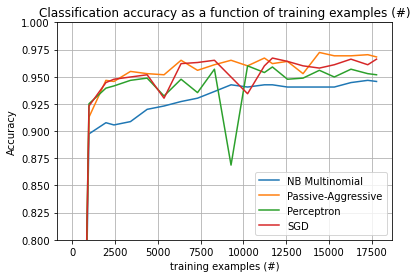

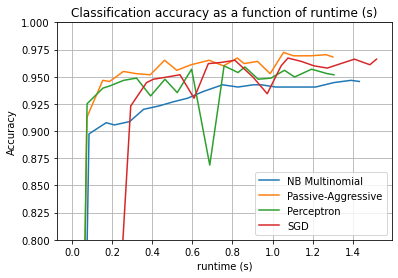

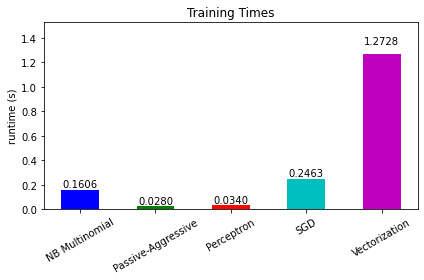

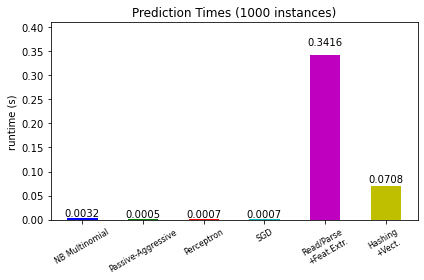

In [4]:
def plot_accuracy(x, y, x_legend):
    """Plot accuracy as a function of x."""
    x = np.array(x)
    y = np.array(y)
    plt.title('Classification accuracy as a function of %s' % x_legend)
    plt.xlabel('%s' % x_legend)
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.plot(x, y)


rcParams['legend.fontsize'] = 10
cls_names = list(sorted(cls_stats.keys()))

# Plot accuracy evolution
plt.figure()
for _, stats in sorted(cls_stats.items()):
    # Plot accuracy evolution with #examples
    accuracy, n_examples = zip(*stats['accuracy_history'])
    plot_accuracy(n_examples, accuracy, "training examples (#)")
    ax = plt.gca()
    ax.set_ylim((0.8, 1))
plt.legend(cls_names, loc='best')

plt.figure()
for _, stats in sorted(cls_stats.items()):
    # Plot accuracy evolution with runtime
    accuracy, runtime = zip(*stats['runtime_history'])
    plot_accuracy(runtime, accuracy, 'runtime (s)')
    ax = plt.gca()
    ax.set_ylim((0.8, 1))
plt.legend(cls_names, loc='best')

# Plot fitting times
plt.figure()
fig = plt.gcf()
cls_runtime = [stats['total_fit_time']
               for cls_name, stats in sorted(cls_stats.items())]

cls_runtime.append(total_vect_time)
cls_names.append('Vectorization')
bar_colors = ['b', 'g', 'r', 'c', 'm', 'y']

ax = plt.subplot(111)
rectangles = plt.bar(range(len(cls_names)), cls_runtime, width=0.5,
                     color=bar_colors)

ax.set_xticks(np.linspace(0, len(cls_names) - 1, len(cls_names)))
ax.set_xticklabels(cls_names, fontsize=10)
ymax = max(cls_runtime) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel('runtime (s)')
ax.set_title('Training Times')


def autolabel(rectangles):
    """attach some text vi autolabel on rectangles."""
    for rect in rectangles:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2.,
                1.05 * height, '%.4f' % height,
                ha='center', va='bottom')
        plt.setp(plt.xticks()[1], rotation=30)


autolabel(rectangles)
plt.tight_layout()
plt.show()

# Plot prediction times
plt.figure()
cls_runtime = []
cls_names = list(sorted(cls_stats.keys()))
for cls_name, stats in sorted(cls_stats.items()):
    cls_runtime.append(stats['prediction_time'])
cls_runtime.append(parsing_time)
cls_names.append('Read/Parse\n+Feat.Extr.')
cls_runtime.append(vectorizing_time)
cls_names.append('Hashing\n+Vect.')

ax = plt.subplot(111)
rectangles = plt.bar(range(len(cls_names)), cls_runtime, width=0.5,
                     color=bar_colors)

ax.set_xticks(np.linspace(0, len(cls_names) - 1, len(cls_names)))
ax.set_xticklabels(cls_names, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(cls_runtime) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel('runtime (s)')
ax.set_title('Prediction Times (%d instances)' % n_test_documents)
autolabel(rectangles)
plt.tight_layout()
plt.show()

<a name="q2.1.1"></a>
<h4>Q2.1.1 Descriptive Statistics</h4> 

Explore how many documents are in the dataset, how many categories, how many documents per categories, provide mean and standard deviation, min and max. (use the pandas library to explore the dataset, use the dataframe.describe() method.)

Explore how many characters and words are present in the documents of the dataset.

In [5]:
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
print(f' number of documents:{len(reuters.fileids())}')
categories=reuters.categories()
print(f'number of categories is: {len(categories)}\nthe categories are {categories}')

[nltk_data] Downloading package reuters to /Users/gab/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


 number of documents:10788
number of categories is: 90
the categories are ['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [6]:
total = len(reuters.paras())
total_multi = 0
lc={}
for c in categories:
    lc[c] = len(reuters.paras(categories=[c]))
    total_multi += lc[c]
    print("%s ---- %d documents out of %d" % (c, lc[c], total))
print("Articles belong to %.4f categories on average" % ((total_multi * 1.0) / total))
print("There are %.4f articles per category on average" % ((total * 1.0) / len(categories)))

acq ---- 2661 documents out of 11887
alum ---- 62 documents out of 11887
barley ---- 58 documents out of 11887
bop ---- 120 documents out of 11887
carcass ---- 69 documents out of 11887
castor-oil ---- 2 documents out of 11887
cocoa ---- 81 documents out of 11887
coconut ---- 6 documents out of 11887
coconut-oil ---- 7 documents out of 11887
coffee ---- 141 documents out of 11887
copper ---- 73 documents out of 11887
copra-cake ---- 3 documents out of 11887
corn ---- 270 documents out of 11887
cotton ---- 65 documents out of 11887
cotton-oil ---- 3 documents out of 11887
cpi ---- 108 documents out of 11887
cpu ---- 6 documents out of 11887
crude ---- 658 documents out of 11887
dfl ---- 3 documents out of 11887
dlr ---- 223 documents out of 11887
dmk ---- 15 documents out of 11887
earn ---- 4211 documents out of 11887
fuel ---- 23 documents out of 11887
gas ---- 65 documents out of 11887
gnp ---- 146 documents out of 11887
gold ---- 131 documents out of 11887
grain ---- 640 documents ou

ten first documents:


<BarContainer object of 10 artists>

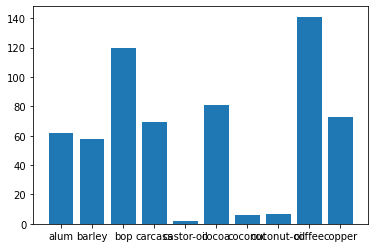

In [29]:
docs=[x for x in lc.values()]
x=[name for name in lc.keys()]
print("ten first documents:")
plt.bar(x[1:11],docs[1:11])

In [30]:
print( f' minimum documents: {min(lc.values())} for categories: {[c for c in lc.keys() if lc[c]==min(lc.values())]}' )
print( f' maximun documents: {max(lc.values())} for categories: {[c for c in lc.keys() if lc[c]==max(lc.values())]}' )

 minimum documents: 2 for categories: ['castor-oil', 'groundnut-oil', 'lin-oil', 'sun-meal']
 maximun documents: 4211 for categories: ['earn']


In [32]:
print(f'total number of words: {len(reuters.words())}')
print(f'average number of words: {len(reuters.words())/len(reuters.fileids())}')

print(f'total number of characters: {len(reuters.raw())}')
print(f'average number of characters: {len(reuters.raw())/len(reuters.fileids())}')

total number of words: 1720901
average number of words: 159.51992955135336
total number of characters: 8846853
average number of characters: 820.0642380422692


<a name="q2.1.2"></a>
<h4>Q2.1.2 Partial-fit classifiers</h4> 

Explain informally what are the classifiers that support the "partial-fit" method discussed in the code.

In the tutorial they used this classifier: SGD,Perceptron,NB Multinomial, Passive-Aggressive wuth partial fit method.
classifier that can support partial fit are classifier with option to online learning- that mean that the algorithm is able to learn when the examples come one by one or in minibatch and dont need compute all the examples together.
the methode let us have a small amound of data in memory at any time and therefore be able to learn the big dataset.

<a name="q2.1.3"></a>
<h4>Q2.1.3 Hashing Vectorizer</h4> 

Explain what is the hashing vectorizer used in this tutorial.  Why is it important to use this vectorizer to achieve "streaming classification"?

the hashing vectorizer convert a collection of text documents to a matrix of token occurrences
It turns a collection of text documents into a scipy.sparse matrix holding token occurrence counts and uses a hashing trick to find the token string name to feature integer index mapping.
it's important to use this vectorizer in stream classification in order to guarantee that the features space remains the same over time,
especially in the case of text classification where new features may appear in each batch.

<a name="q2.2"></a>
<h3>Q2.2. BBC News Dataset</h3>

The <a href="https://www.kaggle.com/c/learn-ai-bbc/data">Kaggle BBC News</a> dataset is a document dataset to test document classification.
It contains 1,500 training documents (news stories from the BBC News) and 700 test documents. Documents are classified into 5 categories: sports, tech, business, 
entertainment, politics.  Text is encoded in the following format: all lower case, quotes are removed and separated, non period punctuations are removed.
For example:
<pre>
lifestyle  governs mobile choice  faster  better or funkier hardware alone is not going to help phone firms sell more handsets
research suggests.  instead  phone firms keen to get more out of their customers should not just be pushing the technology 
for its own sake. consumers are far more interested in how handsets fit in with their lifestyle than they are in screen size  
onboard memory or the chip inside  shows an in-depth study by handset maker ericsson.  
historically in the industry there has been too much focus on using technology   
said dr michael bjorn  senior advisor on mobile media at ericsson s consumer and enterprise lab.
</pre>

Download the data <a href="bbcnews.zip">bbcnews.zip</a> and place it in ../data.

<a name="q2.2.1"></a>
<h4>Q2.2.1 Dataset Exploration</h4>

Explore how many documents are in the dataset, how many categories, how many documents per categories, provide mean and standard deviation, min and max. 

In [35]:
df = pd.read_csv('./bbcnews/BBC News Train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


Category
business         336
entertainment    273
politics         274
sport            346
tech             261
dtype: int64


<AxesSubplot:xlabel='Category', ylabel='count'>

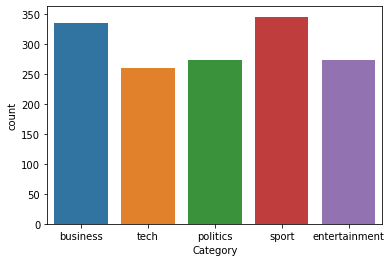

In [36]:
print(df.groupby('Category').size())
sns.countplot(x=df['Category'], label = "Count")

In [37]:
print(f"the minimum value {(df.groupby('Category').size()).min()}")
print(f"the maximum value {(df.groupby('Category').size()).max()}")

print(f"the mean value {(df.groupby('Category').size()).mean()}")
print(f"the standart daviation value {(df.groupby('Category').size()).std()}")

the minimum value 261
the maximum value 346
the mean value 298.0
the standart daviation value 39.74292389847531


<a name="q2.2.2"></a>
<h4>Q2.2.2 Features Extraction</h4>

Select appropriate features for document classification and implement a scikit-learn vectorizer for this dataset.

in order to find features we will use tf-idf vectorizer since it's a text data and we know that it is probably possible to classify a document according to specifics words that occure in it 

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = vectorizer.fit_transform(df.Text).toarray() 
features.shape

(1490, 9927)

In [39]:
features[0]

array([0., 0., 0., ..., 0., 0., 0.])

since the features are big we can try to make smaller dimantion using TSNE - that is an algorithm to reduce dimantions

In [41]:
from sklearn.manifold import TSNE

projected_features = TSNE(n_components=2, random_state=0).fit_transform(features) 
projected_features.shape

(1490, 2)

In [47]:
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
labels = df.category_id 

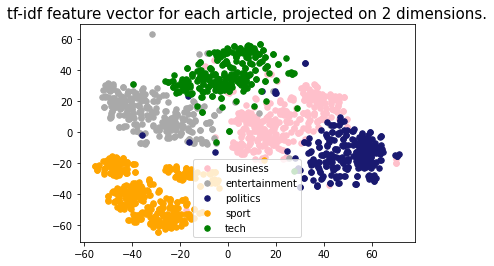

In [49]:
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

# Find points belonging to each category and plot them
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

in this case we can see that 2 dimantions are enoght to distinguish between most classes
but for us training we will use the big features map

<a name="q2.2.3"></a>
<h4>Q2.2.3 Model Training and Evaluation</h4>

Implement a classifier for this dataset.  
<p/>
Report performance, confusion matrix and analyze errors.
<p/>

In order to run the test data, you will need to register to Kaggle and use their submission system.
To avoid the complexity of using the Kaggle submission system, split the train data into 80% training / 20% test.  
<p/>

You can see examples solving this task with good usage of scikit-learn APIs in <a href="https://www.kaggle.com/c/learn-ai-bbc/leaderboard">the Kaggle leaderboard</a>.
In particular, <a href="https://www.kaggle.com/aryankaul31/aryan-bbc-news-classification">aryan-bbc-news-classification</a> demonstrates data exploration for 
classification using pandas, tf-idf features, TSNE visualization for feature vectors, and chi-square correlation between features and labels. 

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = vectorizer.fit_transform(df.Text).toarray() 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, indices_train, indices_test= train_test_split(features, df['category_id'], df.index, test_size=0.20)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.98      0.96      0.97        54
           2       0.96      1.00      0.98        55
           3       1.00      1.00      1.00        57
           4       0.98      1.00      0.99        57

    accuracy                           0.98       298
   macro avg       0.98      0.98      0.98       298
weighted avg       0.98      0.98      0.98       298



Text(0.5, 15.0, 'Predicted')

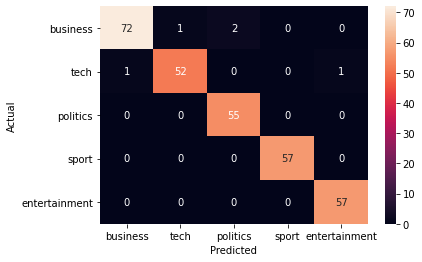

In [54]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
classifier.fit(X_train, y_train)
y_pred =classifier.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [55]:
from IPython.display import display

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 2:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]]['Text'])
            print('')

'business' predicted as 'politics' : 2 examples.


1309    saudi ministry to employ women women will be e...
971     call to save manufacturing jobs the trades uni...
Name: Text, dtype: object

we can see that in most mistakes there is a connection to to error labels for example: in 1309 the classtifier predicted buisness as politics- probably because of the words- ministry.

<hr/>
<a name="q3"></a>
<h2>Q3. Named Entity Recognition</h2>

<h3>Named Entity Recognition</h3>

The task of Named Entity Recognition (NER) involves the recognition of names of persons, locations, organizations, dates in free text.
As we have seen above, Spacy includes a very good NER model as part of its library.  In this question, we will study how to implement 
such a model.

The following sentence is tagged with sub-sequences indicating PER (for persons), LOC (for location) and ORG (for organization):
<pre>
Wolff, currently a journalist in Argentina, played with Del Bosque in the final years of the seventies in Real Madrid.

[PER Wolff ] , currently a journalist in [LOC Argentina ] , played with [PER Del Bosque ] in the final years of the seventies in 
[ORG Real Madrid ] .
</pre>

NER involves 2 sub-tasks: identifying the boundaries of such expressions (the open and close brackets) and labelling the expressions
(with tags such as PER, LOC or ORG).  This sequence labelling task is reduced into a classification task, using the BIO encoding of the data:
<pre>
        Wolff B-PER
            , O
    currently O
            a O
   journalist O
           in O
    Argentina B-LOC
            , O
       played O
         with O
          Del B-PER
       Bosque I-PER
           in O
          the O
        final O
        years O
           of O
          the O
    seventies O
           in O
         Real B-ORG
       Madrid I-ORG
            . O
</pre>


<h3>Dataset</h3>

The dataset we will use for this question is derived from the CoNLL 2002 shared task - which is about NER in Spanish and Dutch.
The dataset is included in the NLTK distribution.  Explanations on the dataset are provided in the 
<a href='https://www.clips.uantwerpen.be/conll2002/ner/'>CoNLL 2002</a> page.
<p/>

To access the data in Python, do:

In [1]:
from nltk.corpus import conll2002

etr = conll2002.chunked_sents('esp.train') # In Spanish
eta = conll2002.chunked_sents('esp.testa') # In Spanish
etb = conll2002.chunked_sents('esp.testb') # In Spanish

dtr = conll2002.chunked_sents('ned.train') # In Dutch
dta = conll2002.chunked_sents('ned.testa') # In Dutch
dtb = conll2002.chunked_sents('ned.testb') # In Dutch

The data consists of three files per language (Spanish and Dutch): one training file and two test files testa and testb. 
The first test file is to be used in the development phase for finding good parameters for the learning system. 
The second test file will be used for the final evaluation.

<a name="q3.1"></a>
<h3>Q3.1 Features</h3>

Your task consists of:
<ol>
<li>Choosing good features for encoding the problem.
<li>Encode your training dataset.
<li>Run a classifier over the training dataset.
<li>Train and test the model.
<li>Perform error analysis and fine tune model parameters on the testa part of the datasets.
<li>Perform evaluation over the testb part of the dataset, reporting on accuracy, per label precision, per label recall and per label F-measure, and confusion matrix.
</ol>
<p/>

Here is a list of features that have been found appropriate for NER in previous work:
<ol>
<li>The word form (the string as it appears in the sentence)
<li>The POS of the word (which is provided in the dataset)
<li>ORT - a feature that captures the orthographic (letter) structure of the word.  It can have any of the following values: 
    number, contains-digit, contains-hyphen, capitalized, all-capitals, URL, punctuation, regular. 
<li>prefix1: first letter of the word
<li>prefix2: first two letters of the word
<li>prefix3: first three letters of the word
<li>suffix1: last letter of the word
<li>suffix2: last two letters of the word
<li>suffix3: last three letters of the word
</ol>

<p/>

For example, given the following toy training data, the encoding of the features would be:
<pre>
        Wolff NP  B-PER
            , ,   O
    currently RB  O
            a AT  O
   journalist NN  O
           in IN  O
    Argentina NP  B-LOC
            , ,   O
       played VBD O
         with IN  O
          Del NP  B-PER
       Bosque NP  I-PER
           in IN  O
          the AT  O
        final JJ  O
        years NNS O
           of IN  O
          the AT  O
    seventies NNS O
           in IN  O
         Real NP  B-ORG
       Madrid NP  I-ORG
            . .   O

<u>Classes</u>
1 B-PER
2 I-PER
3 B-LOC
4 I-LOC
5 B-ORG
6 I-ORG
7 O

<u>Feature WORD-FORM:</u>
1 Wolff
2 ,
3 currently
4 a
5 journalist
6 in
7 Argentina
8 played
9 with
10 Del
11 Bosque
12 the
13 final
14 years
15 of
16 seventies
17 Real
18 Madrid
19 .

<u>Feature POS</u>
20 NP
21 ,
22 RB
23 AT
24 NN
25 VBD
26 JJ
27 NNS
28 .

<u>Feature ORT</u>
29 number
30 contains-digit
31 contains-hyphen
32 capitalized
33 all-capitals
34 URL
35 punctuation
36 regular

<u>Feature Prefix1</u>
37 W
38 ,
39 c
40 a
41 j
42 i
43 A
44 p
45 w
46 D
47 B
48 t
49 f
50 y
51 o
52 s
53 .
</pre>

Given this encoding, we can compute the vector representing the first word "Wolff NP B-PER" as:
<pre>
# Class: B-PER=1
# Word-form: Wolff=1
# POS: NP=20
# ORT: Capitalized=32
# prefix1: W=37
1 1:1 20:1 32:1 37:1
</pre>

When you encode the test dataset, some of the word-forms will be unknown (not seen in the training dataset).
You should, therefore, plan for a special value for each feature of type "unknown" when this is expected.
<p/>

Instead of writing the code as explained above, use the Scikit-learn vectorizer and pipeline library.
General information on feature extraction for text data in Scikit-Learn is 
in <a href="https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction">the Scikit-Learn documentation</a>.
Refer to the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html">DictVectorizer</a> for this specific task.
<a href="https://scikit-learn.org/stable/auto_examples/text/plot_hashing_vs_dict_vectorizer.html">Hashing vs. DictVectorizer</a>
also provides useful background.

<a name="q3.1.1"></a>
<h4>Q3.1.1 Feature Extraction</h4>

Start from the following example notebook
<a href="http://nbviewer.ipython.org/github/tpeng/python-crfsuite/blob/master/examples/CoNLL%202002.ipynb">CoNLL 2002 Classification with CRF</a>.
You do not need to install Python-CRFSuite - just take this notebook as a starting point to explore the dataset and ways to encode features.
(This notebook also gives you an indication of the level of result you can expect to obtain.)

In [1]:
from nltk.corpus import conll2002
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import string  
import urllib

In [2]:
try:
    etr = conll2002.chunked_sents('esp.train') # In Spanish
except:
    nltk.download('conll2002')
    etr = conll2002.chunked_sents('esp.train') # In Spanish

etr2 = list(conll2002.iob_sents('esp.train'))
eta2 = list(conll2002.iob_sents('esp.testa'))
etb2 = list(conll2002.iob_sents('esp.testb'))


we will define features according to the list of features that have been found appropriate for NER in previous work
latter we will add feature regarding word before and after the current word

In [3]:
ORT={1:'number', 2:'contains-digit', 3:'contains-hyphen', 4:'capitalized', 5:'all-capitals', 6:'URL', 7:'punctuation', 8:'regular'}
def ORTrecon(sent):
    if sent.isdigit():
        return 1
    if any(char.isdigit() for char in sent):
        return 2
    if '-' in sent:
        return 3
    if sent[0].isupper():
        return 4
    if sent.isupper():
        return 5
    if urllib.parse.urlparse(sent).scheme != "":
        return 6
    if sent in string.punctuation: 
        return 7
    else:
        return 8
        

def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]
    features = {
        
        'word.lower' : word.lower(),
        'pre1' : word[:1],
        'pre2' : word[:2],
        'pre3' : word[:3],
        'suf1' : word[-1:],
        'suf2' : word[-2:],
        'suf3' : word[-3:],
        'ORT' : ORT[ORTrecon(word)],
        'postag' : postag,
    }

    return features

def sent2features(sent):
    features = []
    for i in range(0,len(sent)):
        features.append(word2features(sent,i))
    return features
    
def sent2labels(sent):
    return [label for token, postag, label in sent]

building the data set using the features we choose

In [4]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer()

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

train_sents = etr2
X_esp_train = [sent2features(s) for s in train_sents]
y_esp_train = [sent2labels(s) for s in train_sents]

test_sents = eta2
X_esp_test = [sent2features(s) for s in test_sents]
y_esp_test = [sent2labels(s) for s in test_sents]

In [5]:
print(f'X_esp_train: {len(X_esp_train)}, y_esp_train: {len(y_esp_train)}')
print(f'X_esp_test: {len(X_esp_test)}, y_esp_test: {len(y_esp_test)}')


X_esp_train: 8323, y_esp_train: 8323
X_esp_test: 1915, y_esp_test: 1915


we do the same for dutch

In [6]:
try:
    dtr = conll2002.chunked_sents('ned.train') # In Dutch
except:
    nltk.download('conll2002')
    dtr = conll2002.chunked_sents('ned.train') # In dutch

dtr2 = list(conll2002.iob_sents('ned.train'))
dta2 = list(conll2002.iob_sents('ned.testa'))
dtb2 = list(conll2002.iob_sents('ned.testb'))

In [7]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer()

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

train_sents = dtr2
X_ned_train = [sent2features(s) for s in train_sents]
y_ned_train = [sent2labels(s) for s in train_sents]

test_sents = dta2
X_ned_test = [sent2features(s) for s in test_sents]
y_ned_test = [sent2labels(s) for s in test_sents]

In [8]:
print(f'X_ned_train: {len(X_ned_train)}, y_esp_train: {len(y_ned_train)}')
print(f'X_ned_test: {len(X_ned_test)}, y_esp_test: {len(y_ned_test)}')


X_ned_train: 15806, y_esp_train: 15806
X_ned_test: 2895, y_esp_test: 2895


<a name="q3.1.2"></a>
<h4>Q3.1.2 Model Training</h4>

Train the model using a logistic regression classifier and experiment with better features - 
looking at the tags of the previous word, the previous word and the following word (add padding words in the vectorizer).

## training model with spanish

In [9]:
v = DictVectorizer(sparse=True)
encoder=LabelEncoder()

def fit(X_train):
    flattened_X_esp_train = []
    for i in range(len(X_train)):
        for j in range(len(X_train[i])):
            flattened_X_esp_train.append(X_train[i][j])
    v.fit(np.array(flattened_X_esp_train))
    
def extract_features(X,y):
    flattened_X_esp_train = []
    flattened_y_esp_train = []
    for i in range(len(X)):
        assert(len(X[i]) == len(y[i]))
        for j in range(len(X[i])):
            flattened_X_esp_train.append(X[i][j])
            flattened_y_esp_train.append(y[i][j])
    X = np.array(flattened_X_esp_train)
    X = v.transform(X)
  
    y = np.array(flattened_y_esp_train)
    y = encoder.fit_transform(y)

    return X,y

In [10]:
fit(X_esp_train)
X,y = extract_features(X_esp_train,y_esp_train)
X_test,y_test = extract_features(X_esp_test,y_esp_test)
y.shape

(264715,)

In [11]:
encoder.inverse_transform([0,1,2,3,4,5,6,7,8])

array(['B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG',
       'I-PER', 'O'], dtype='<U6')

In [12]:
lg_clf = LogisticRegression(random_state = 0)

lg_clf.fit(X, y)
y_test_pred = lg_clf.predict(X_test)
labels = ['B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG','I-PER', 'O']
print(classification_report(y_test, y_test_pred, target_names=labels))

              precision    recall  f1-score   support

       B-LOC       0.55      0.77      0.65       984
      B-MISC       0.51      0.44      0.47       445
       B-ORG       0.73      0.71      0.72      1700
       B-PER       0.68      0.61      0.64      1222
       I-LOC       0.62      0.36      0.46       337
      I-MISC       0.42      0.19      0.26       654
       I-ORG       0.55      0.28      0.37      1366
       I-PER       0.52      0.55      0.53       859
           O       0.97      1.00      0.99     45356

    accuracy                           0.93     52923
   macro avg       0.62      0.55      0.57     52923
weighted avg       0.92      0.93      0.92     52923



/opt/anaconda3/envs/nlp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


we got 93% accuracy that look a good result but if we look deeper we can see that most of the word are 'O' and that for that category the classifier is right in 99%, but for other categories the classifier give results of about 50% , that is not very good
we will try to insert to the features information about previous and next words

## trying with better features

In [13]:
def word2features2(sent, i):
    word = sent[i][0]
    postag = sent[i][1]
    features = {
        
        'word.lower' : word.lower(),
        'pre1' : word[:1],
        'pre2' : word[:2],
        'pre3' : word[:3],
        'suf1' : word[-1:],
        'suf2' : word[-2:],
        'suf3' : word[-3:],
        'ORT' : ORT[ORTrecon(word)],
        'postag' : postag,
    }

    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower=' : word1.lower(),
            '-1:postag=' : postag1,
            
        })
    else:
        features.update({'-1':'BOS'})
        
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower=' : word1.lower(),
            '+1:postag=' : postag1,
        })
    else:
        features.update({'+1':'EOS'})
                
    return features



def sent2features2(sent):
    features = []
    for i in range(0,len(sent)):
        features.append(word2features2(sent,i))
    return features
    
def sent2labels(sent):
    return [label for token, postag, label in sent]

In [14]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer()

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

train_sents = etr2
X_esp_train2 = [sent2features2(s) for s in train_sents]
y_esp_train2 = [sent2labels(s) for s in train_sents]

test_sents = eta2
X_esp_test2 = [sent2features2(s) for s in test_sents]
y_esp_test2 = [sent2labels(s) for s in test_sents]

In [15]:
fit(X_esp_train2)
X2,y2 = extract_features(X_esp_train2,y_esp_train2)
X_test2,y_test2 = extract_features(X_esp_test2,y_esp_test2)
X_test2.shape

(52923, 83336)

In [16]:
lg_clf = LogisticRegression(random_state = 0)

lg_clf.fit(X2, y2)
y_test_pred2 = lg_clf.predict(X_test2)
labels = ['B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG','I-PER', 'O']
print(classification_report(y_test2, y_test_pred2, target_names=labels))

              precision    recall  f1-score   support

       B-LOC       0.59      0.77      0.67       984
      B-MISC       0.57      0.45      0.50       445
       B-ORG       0.79      0.75      0.77      1700
       B-PER       0.85      0.78      0.82      1222
       I-LOC       0.66      0.55      0.60       337
      I-MISC       0.50      0.29      0.36       654
       I-ORG       0.67      0.44      0.53      1366
       I-PER       0.76      0.80      0.78       859
           O       0.98      1.00      0.99     45356

    accuracy                           0.95     52923
   macro avg       0.71      0.65      0.67     52923
weighted avg       0.94      0.95      0.94     52923



/opt/anaconda3/envs/nlp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


we got better results but still that classifier almost always right with 'O' but with other categories it get about 70%

## training model with dutch

In [17]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer()

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

train_sents = dtr2
X_ned_train2 = [sent2features2(s) for s in train_sents]
y_ned_train2 = [sent2labels(s) for s in train_sents]

test_sents = dta2
X_ned_test2 = [sent2features2(s) for s in test_sents]
y_ned_test2 = [sent2labels(s) for s in test_sents]

In [18]:
fit(X_ned_train2)
X4,y4 = extract_features(X_ned_train2,y_ned_train2)
X_test4,y_test4 = extract_features(X_ned_test2,y_ned_test2)
X_test4.shape

(37687, 88567)

In [19]:
lg_clf = LogisticRegression(random_state = 0)

lg_clf.fit(X4, y4)
y_test_pred4 = lg_clf.predict(X_test4)
labels = ['B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG','I-PER', 'O']
print(classification_report(y_test4, y_test_pred4, target_names=labels))

              precision    recall  f1-score   support

       B-LOC       0.76      0.76      0.76       479
      B-MISC       0.78      0.74      0.76       748
       B-ORG       0.84      0.59      0.69       686
       B-PER       0.67      0.79      0.73       703
       I-LOC       0.61      0.27      0.37        64
      I-MISC       0.63      0.43      0.51       215
       I-ORG       0.84      0.54      0.66       396
       I-PER       0.63      0.84      0.72       423
           O       0.99      1.00      1.00     33973

    accuracy                           0.97     37687
   macro avg       0.75      0.66      0.69     37687
weighted avg       0.97      0.97      0.97     37687



/opt/anaconda3/envs/nlp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


with dutch we got much better result
maybe the structure of language is easier to clssify the role of a word

<a name="q3.1.3"></a>
<h4>Q3.1.3 Greedy Tagging vs. Sequence Tagging</h4>

We implemented above a version of NER which is based on <i>greedy tagging</i>: that is, without optimizing the sequence of tags 
as we would obtain by training an HMM or CRF model.  
In particular, we did not check that the BIO tags produced by the tagger is a legal sequence.
Write code to identify sequences of BIO tags which are illegal and report on the frequency of this problem for each type
of illegal tags transition (O-IX, IX-IY, BX-IY).  Comment on your observations.

In [20]:
is_I = lambda x: x in [1,4,6,8]
is_B = lambda x: x in [0,3,5,7]
is_O = lambda x: x == 2
def reform_predicted(original, flattened):
    original = [len(sent) for sent in original]
    res = []
    for i in range (len(original)):
        res += [flattened[:original[i]]]
        flattened = flattened[original[i]:]
    return res

original,flattened = [[1,2,3,4],[5,6,7],[8,9,10,11],[12,13,14,15,16]],['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
reform_predicted(original,flattened)

[['1', '2', '3', '4'],
 ['5', '6', '7'],
 ['8', '9', '10', '11'],
 ['12', '13', '14', '15', '16']]

In [21]:
error_types = {'O-IX': 0,
               'IX-IY': 0,
               'BX-IY' :0
               }
predicted_reformed = reform_predicted(y_esp_test,y_test_pred)
for sent in predicted_reformed:
    for i in range(len(sent)-1):
        if is_O(sent[i]) and is_I(sent[i+1]):
            error_types['O-IX'] += 1
        if is_I(sent[i]) and is_I(sent[i+1]) and sent[i] != sent[i+1]:
            error_types['IX-IY'] += 1
        if is_B(sent[i]) and is_I(sent[i+1]) and sent[i]+1 != sent[i+1]:
            error_types['BX-IY'] += 1
print('error O-IX:',error_types['O-IX'])
print('error IX-IY:',error_types['IX-IY'])
print('error BX-IY:',error_types['BX-IY'])
print(f'overall error ratio: {sum(error_types.values())/len(y_test_pred)}')


error O-IX: 1472
error IX-IY: 1703
error BX-IY: 2111
overall error ratio: 0.09988095912930106


almost 10% of the prediction have a mistake in the sentence structure, that may be a way to improve the model taking only results that give legal BIO tags

<a name="q3.2"></a>
<h3>Q3.2 Using Word Embeddings</h3>

One way to improve a greedy tagger for NER is to use Word Embeddings as features.
A convenient package to manipulate Word2Vec word embeddings is provided in the <a href="https://radimrehurek.com/gensim/">gensim</a> package by Radim Rehurek.
To install it, use:

In [4]:
!pip install gensim

You must also download a pre-trained Word2Vec or fastText word embedding model.
The models must naturally be in Spanish or Dutch. (Only test word embeddings for one language.)
You can find pre-trained word embedding models in different formats:
<ol>
<li><a href="https://github.com/facebookresearch/fastText/blob/master/docs/pretrained-vectors.md">fastText pretrained models</a> (includes models for 294 languages)
<li><a href="https://github.com/uchile-nlp/spanish-word-embeddings">Spanish Word2vec models</a> 
</ol>

Specific information on manipulating word vectors with Gensim is provided in Gensim with the <a href="https://radimrehurek.com/gensim/models/keyedvectors.html">KeyedVector</a>.
Practical examples are available for Spanish in this <a href="https://github.com/uchile-nlp/spanish-word-embeddings/blob/master/examples/Ejemplo_WordVectors.ipynb">notebook</a>.
(Pay attention that word embeddings large are pretty big files - about 3GB when uncompressed.)

Your task:
<ol>
<li>Add word embeddings as dense vectors to the features of your NER classifier for each word feature (current word, previous word, next word) - either in Spanish or in Dutch.
<li>Retrain the model and report on performance.  Comment.
</ol>

In [25]:
from gensim.models.wrappers import FastText
wordvectors_file = 'fasttext-sbwc.bin'
wordvectors = FastText.load_fasttext_format(wordvectors_file)
wordvec= wordvectors.wv

In [4]:
from gensim.models.keyedvectors import KeyedVectors
wordvectors_file_vec = 'fasttext-sbwc.3.6.e20.vec'
cantidad = 100000
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)
wordvec= wordvectors.wv

<ipython-input-4-8edc554db247>:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  wordvec= wordvectors.wv


In [26]:
wordvec['i']

array([ 0.09308621,  0.13575903,  0.32066905, -0.04645631,  0.17830259,
       -0.08300799,  0.0134743 ,  0.00728581, -0.22711569,  0.28232634,
       -0.21909672, -0.16009901,  0.10111913,  0.22334445, -0.28893474,
        0.04611127,  0.2907878 , -0.02798332,  0.09278861,  0.14880201,
       -0.32487965,  0.19018716, -0.26646835,  0.24654458, -0.14126346,
       -0.52067435,  0.13641559, -0.1952762 , -0.11595683, -0.0162545 ,
       -0.14669822,  0.16066636,  0.08808063, -0.04513218, -0.33416927,
       -0.27444628,  0.13118125,  0.09793426, -0.10226148, -0.08967437,
       -0.08603632,  0.10924771, -0.03838813, -0.22711852,  0.26802292,
        0.34735   ,  0.09917481,  0.3701055 ,  0.46873295, -0.06395313,
        0.20315112, -0.10584307,  0.32846498,  0.20170146,  0.1722404 ,
       -0.46198484,  0.16645345, -0.11210483, -0.23858705,  0.1843492 ,
        0.2417461 ,  0.22210692,  0.14008228,  0.38744977,  0.03890306,
        0.3307675 , -0.18684664,  0.13391355, -0.21317448, -0.13

In [27]:
def word2featuresW(sent, i):
    word = sent[i][0]
    postag = sent[i][1]
    word2vec=word2vect(word)
    features = {
        
        'word.lower' : word.lower(),
        'pre1' : word[:1],
        'pre2' : word[:2],
        'pre3' : word[:3],
        'suf1' : word[-1:],
        'suf2' : word[-2:],
        'suf3' : word[-3:],
        'ORT' : ORT[ORTrecon(word)],
        'postag' : postag,
    }

    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower=' : word1.lower(),
            '-1:postag=' : postag1,
            
        })
        word2vec=np.append(word2vec,word2vect(word1))


    else:
        features.update({'-1':'BOS'})
        word2vec=np.append(word2vec,np.zeros(wordvec['i'].shape[0]))
        
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower=' : word1.lower(),
            '+1:postag=' : postag1,
        })
        word2vec=np.append(word2vec,word2vect(word1))


    else:
        features.update({'+1':'EOS'})
        word2vec=np.append(word2vec,np.zeros(wordvec['i'].shape[0]))
                
    return features,word2vec

def word2vect(sent):
    try:
        vect= wordvec[sent]
    except:
        vect=np.random.rand(wordvec['i'].shape[0])
    return vect


def sent2featuresW(sent):
    features = []
    word2vecs=[]
    for i in range(0,len(sent)):
        feature,word2vec= word2featuresW(sent,i)
        features.append(feature)
        word2vecs.append(word2vec)
    return features,word2vecs
    
def sent2labels(sent):
    return [label for token, postag, label in sent]

In [28]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer()

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

def feature_create(sents):
    X_trainW_f=[]
    X_trainW_v=[]
    for s in sents:
        features,word2vecs = sent2featuresW(s)
        X_trainW_f.append(features)
        X_trainW_v.append(word2vecs)
    return X_trainW_f,X_trainW_v

train_sents = etr2
X_esp_trainW_f ,X_esp_trainW_v =feature_create(train_sents)
y_esp_trainW = [sent2labels(s) for s in train_sents]

test_sents = eta2
X_esp_testW_f ,X_esp_testW_v =feature_create(test_sents)
y_esp_testW = [sent2labels(s) for s in test_sents]

In [29]:
v = DictVectorizer(sparse=True)
encoder=LabelEncoder()

def fit2(X_train_f,X_train_v):
    flattened_X_v = []
    flattened_X_f = []
    for i in range(len(X_train_f)):
        for j in range(len(X_train_f[i])):
            flattened_X_v.append(X_train_v[i][j])
            flattened_X_f.append(X_train_f[i][j])
    v.fit(np.array(flattened_X_f))
    
def extract_features2(X_f,X_v,y):
    flattened_X_v = []
    flattened_X_f = []
    flattened_y = []
    for i in range(len(X_f)):
        assert(len(X_f[i]) == len(y[i]))
        for j in range(len(X_f[i])):
            flattened_X_v.append(X_v[i][j])
            flattened_X_f.append(X_f[i][j])
            flattened_y.append(y[i][j])
    X = np.array(flattened_X_f)
    X = v.transform(X)
    
    X2 = np.array(flattened_X_v)


  
    y = np.array(flattened_y)
    y = encoder.fit_transform(y)

    return X,X2,y

In [30]:
def extract_features3(X_f,X_v,y):
    flattened_X = []
    flattened_y = []
    for i in range(len(X_f)):
        assert(len(X_f[i]) == len(y[i]))
        for j in range(len(X_f[i])):
            line= v.transform(X_f[i]).toarray()
            flattened_X.append(np.append(line,X_v[i][j]))
            flattened_y.append(y[i][j])
        
    X = np.array(flattened_X)  
    y = np.array(flattened_y)
    y = encoder.fit_transform(y)

    return X,y

In [31]:
from scipy import sparse
from scipy.sparse import hstack
fit2(X_esp_trainW_f,X_esp_trainW_v)
Xw_f,Xw_v,yw = extract_features2(X_esp_trainW_f,X_esp_trainW_v,y_esp_trainW)
Xw_v2 = sparse.csr_matrix(Xw_v)

In [32]:
Xw_v2.shape,Xw_f.shape,yw.shape

((264715, 900), (264715, 83336), (264715,))

In [33]:
X=hstack([Xw_f,Xw_v2])

In [34]:
X.shape

(264715, 84236)

In [35]:
lg_clf = LogisticRegression(random_state = 0,max_iter=10000)
lg_clf.fit(X,yw)


/opt/anaconda3/envs/nlp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [36]:

Xw_v2 = sparse.csr_matrix(Xw_v)

X_test_f,X_test_v,y_test = extract_features2(X_esp_testW_f ,X_esp_testW_v,y_esp_testW)

X_test_v2 = sparse.csr_matrix(X_test_v)
X_test=hstack([X_test_f,X_test_v2])

In [37]:
y_test_predw = lg_clf.predict(X_test)
labels = ['B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG','I-PER', 'O']
print(classification_report(y_test, y_test_predw, target_names=labels))

              precision    recall  f1-score   support

       B-LOC       0.57      0.72      0.64       984
      B-MISC       0.42      0.43      0.43       445
       B-ORG       0.74      0.70      0.72      1700
       B-PER       0.82      0.77      0.79      1222
       I-LOC       0.47      0.51      0.49       337
      I-MISC       0.41      0.29      0.34       654
       I-ORG       0.64      0.44      0.52      1366
       I-PER       0.79      0.77      0.78       859
           O       0.98      0.99      0.99     45356

    accuracy                           0.94     52923
   macro avg       0.65      0.62      0.63     52923
weighted avg       0.94      0.94      0.94     52923



with this method we didnt get better results than before, that is suprising since we believed that adding word emmbedding might improve the model.
there may be few reason for that:
one reason is that the word emmbeding features was less than the feature built by the dictionary- 900 vs 83,000 and therefore maybe this was significant enough.
another reason for that maybe the feature structures that don't compare between the rights word emmbedding features(enttering the word emmbeding into the feature dictionary didn't work)
another factor may be the unknown words- in the data there are lots of unknown words that get a 0- array mapping and might influence the results.